# Step 0: Imports and loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
pd.set_option('display.max_columns', 500)

In [7]:
data = pd.read_excel('Competition1_raw_data.xlsx')

In [8]:
data.head(25)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.2,94,1,0.06,-0.0575561,42402916,7407407,197.591,510,17999,13934,328,815,62,96,181
6,ACOR,ACORDA THERAPEUTICS INC,2836,6,13,11,6.72,128,1,-1.87,0.00410552,19047022,5500000,5.146,495,15758,13953,379,698,82,106,135
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,0.04062,19371750,8000000,-,334,11226,10056,276,-1,55,120,122
8,ACTV,ACTIVE NETWORK INC,7372,15,18,16,15.9,100,1,-0.51,-0.0293159,52982501,11000000,279.6,620,14813,13463,335,917,58,124,234
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,-0.0249251,33622690,11000000,494.008,385,9134,8107,198,459,81,90,147


# Step 1: Identify the null values

In [14]:
for col in data.columns:
    data[col] = data[col].apply(lambda x: None if x == '-' else x)

# Step 2: Descriptive Statistics
- Mean/median/std/min/max/count/quartiles
- Missing Records
- Outlier Identification
    - Address Outliers
- Data Types/Fix data types

In [16]:
data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


Counts of null values

In [17]:
pd.isna(data).sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64

Data Types before being fixed (necessary due to the way nulls were given as a string initially)

In [18]:
data.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

Column:  P(IPO)


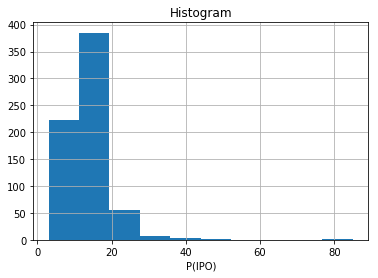

outliers low value < 1.730203681963891
outlier low count:  0
outliers high value > 25.94512866663286
outlier high count:  16


Column:  P(H)


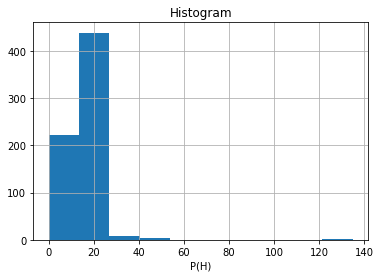

outliers low value < 2.1743324687374805
outlier low count:  1
outliers high value > 28.788048483643472
outlier high count:  11


Column:  P(L)


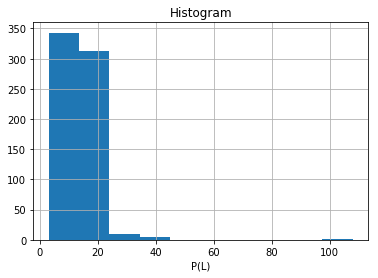

outliers low value < 1.8437531037121246
outlier low count:  0
outliers high value > 25.18633618200216
outlier high count:  11


Column:  P(1Day)


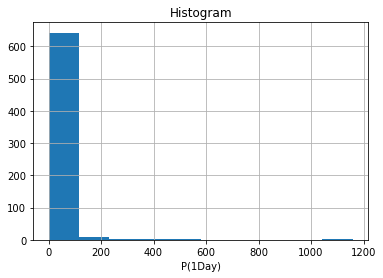

outliers low value < -120.53512953076594
outlier low count:  0
outliers high value > 172.40466182948316
outlier high count:  11


Column:  C1


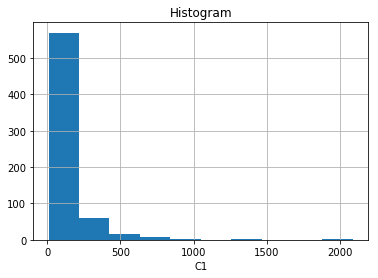

outliers low value < -155.90614617935304
outlier low count:  0
outliers high value > 455.36372193692875
outlier high count:  24


Column:  C2


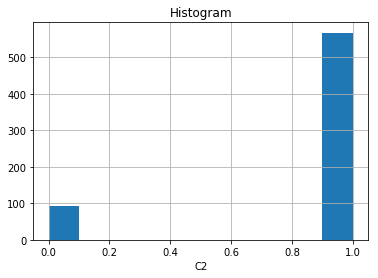

outliers low value < 0.1627076466360009
outlier low count:  93
outliers high value > 1.5554741715458174
outlier high count:  0


Column:  C3


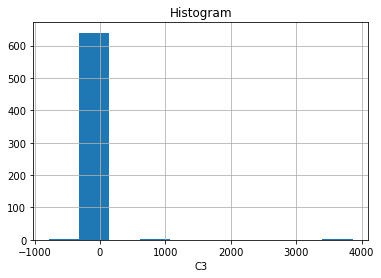

outliers low value < -323.54415964712496
outlier low count:  3
outliers high value > 327.1219676966606
outlier high count:  2


Column:  C4


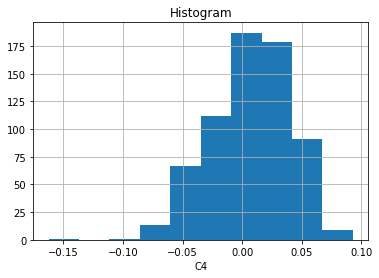

outliers low value < -0.05935308672575004
outlier low count:  16
outliers high value > 0.07391748954862712
outlier high count:  5


Column:  C5


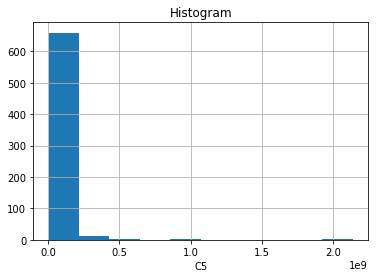

outliers low value < -159395111.61470667
outlier low count:  0
outliers high value > 258110630.30405578
outlier high count:  12


Column:  C6


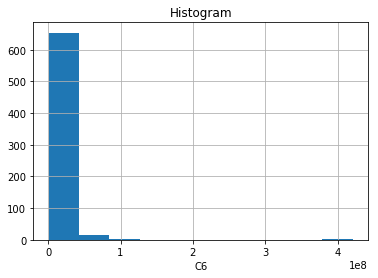

outliers low value < -37841915.220152475
outlier low count:  0
outliers high value > 62672303.67873236
outlier high count:  11


Column:  C7


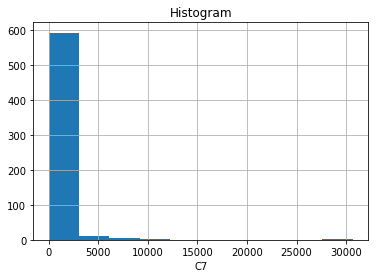

outliers low value < -2796.215306318365
outlier low count:  0
outliers high value > 3797.1352309085287
outlier high count:  14


Column:  T1


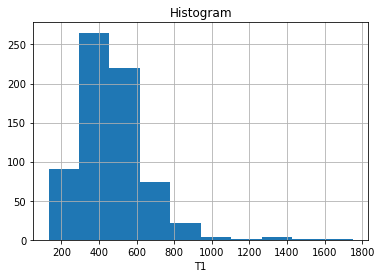

outliers low value < 114.15106771411746
outlier low count:  0
outliers high value > 817.1176547528428
outlier high count:  21


Column:  T2


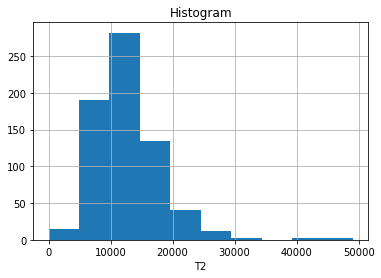

outliers low value < 1859.3172671740995
outlier low count:  3
outliers high value > 23657.895654999178
outlier high count:  22


Column:  T3


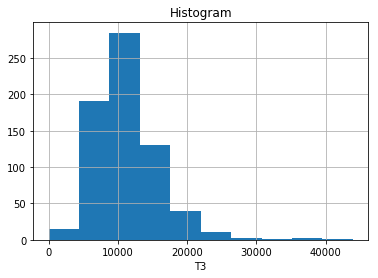

outliers low value < 1716.503989375864
outlier low count:  3
outliers high value > 21075.184703722523
outlier high count:  22


Column:  T4


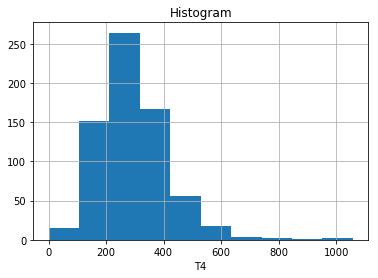

outliers low value < 51.28861673137587
outlier low count:  2
outliers high value > 537.4191659411645
outlier high count:  24


Column:  T5


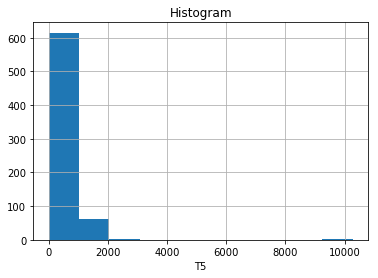

outliers low value < -266.6083825203656
outlier low count:  0
outliers high value > 1625.0489111547267
outlier high count:  10


Column:  S1


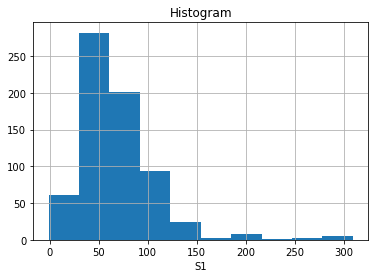

outliers low value < -9.771611894381138
outlier low count:  0
outliers high value > 146.6144900147923
outlier high count:  21


Column:  S2


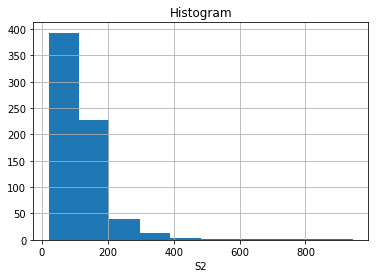

outliers low value < -49.553660316444436
outlier low count:  0
outliers high value > 289.7621772033754
outlier high count:  24


Column:  S3


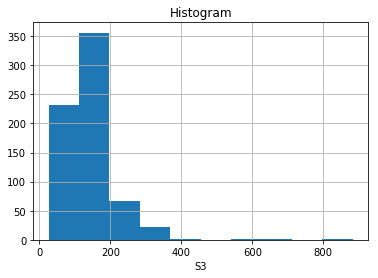

outliers low value < 6.206607382126208
outlier low count:  0
outliers high value > 283.31174797763884
outlier high count:  27




In [19]:
#Only plot numberical columns so drop non-numerical
for col in data.drop(['I1','I2','I3'],axis=1).columns:
    print("Column: ", col)
    
    #Create Histograms
    data[col].hist()
    plt.xlabel(col)
    plt.title('Histogram')
    plt.show()
    
    #Find outliers within 2 standard deviations of mean
    outliers_low = (data[col].mean() - 3*data[col].std())
    outliers_high = (data[col].mean() + 3*data[col].std())
    
    #Print outlier values and counts of how many outliers
    print("outliers low value <", outliers_low)
    print("outlier low count: ", data[col][data[col] < outliers_low].count())
    print("outliers high value >", outliers_high) 
    print("outlier high count: ", data[col][data[col] > outliers_high].count())
    print('\n')

# Step 3: Data Imputation
- Address null values dependent on the type of value in question
- Create a seperate column which shows whether or not imputation occurred

In [20]:
def impute_nulls_df(df, col, replace_val):
    '''
    params:
    
    df - dataframe containing nulls
    col - columns with nulls to replace
    replace_val - options: 'mean', 'median', 'mode'
    
    Example:

    imputed_data = impute_nulls(data, C1, 'mean')
    '''
    
    if replace_val not in ['mean','median','mode']:
        print('requires one of the following: mean, median, mode')
        return
    
    elif replace_val == 'mean':
        df[col + '_imputed'] = df[col].fillna(df[col].mean())
    elif replace_val == 'median':
        df[col + '_imputed'] = df[col].fillna(df[col].median())
    else:
        df[col + '_imputed'] = df[col].fillna(df[col].mode())
        
    return df

Create a dictionary for each value with the column and the type of imputation. Can then use a loop and the function above to impute them all.

In [21]:
# Example below
imputing = {
    'C1': 'mean',
    'C2': 'mean'
}

data_w_imputed = data.copy()

for key in imputing.keys():
    data_w_imputed = impute_nulls_df(data_w_imputed, key, imputing[key])

Now there are new imputed columns at the end of the dataframe

In [22]:
data_w_imputed

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C1_imputed,C2_imputed
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,122.0,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,259.0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,90.0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,209.0,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,ZIP,ZIPCAR INC,7514,18.0,16.0,14.0,28.000000,317.0,1.0,-0.37,0.004670,38386565.0,9684109.0,186.101,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0,317.0,1.0
678,ZLTQ,Zeltiq Aesthetics Inc,3845,13.0,16.0,14.0,15.500000,98.0,1.0,-0.41,0.058689,32758082.0,7000000.0,25.461,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0,98.0,1.0
679,ZSTN,"ZST Digital Networks, Inc.",3663,8.0,8.5,7.5,7.520000,112.0,0.0,0.60,0.030425,11479826.0,3125000.0,55.431,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0,112.0,0.0
680,ZUMZ,Zumiez Inc,5600,19.0,17.0,15.0,12.435000,78.0,1.0,0.20,0.032284,13180261.0,3125000.0,117.857,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0,78.0,1.0


# Step 4: Check Normality of fields

- Histogram
- Shapiro test for normality: a p-value of lower than 0.05 implies non-normal values

In [23]:
def check_normal_by_hist(df, col):
    '''
    Creates a histogram to view values to check normality
    
    params:
    df - DataFrame
    col - Columns of DataFrame you want to test
    
    return:
    Void, however will print a histogram
    
    '''
    df[col].hist()
    plt.show()
    
def check_normal_by_shapiro(df, col):
    '''
    Runs the Shapiro normality test on the values from a dataframe
    
    params:
    df - DataFrame
    col - Columns of DataFrame you want to test
    
    return:
    tuple - (Test Statistic, p-value)
    
    A p-value lower than 0.05 implies the values are NOT normal
    
    '''
    
    return shapiro(df[col].values)
    

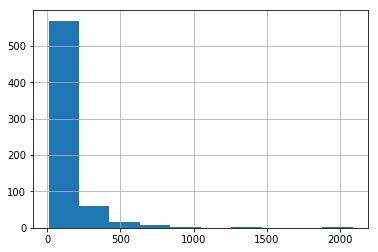

In [24]:
check_normal_by_hist(data_w_imputed, 'C1')

In [32]:
shapiro(data_w_imputed['C1_imputed'])

(0.5366458892822266, 7.148707300171482e-39)

# Step 4B: Create New Columns with Normalized values of non-normal fields
- Try applying squaring, log(), square root, 1/x function
- Leverage Histograms and Shapiro-Wilk test
- Or right to Z-Scoring

# Step 5B: Create values outlined in Data Dictionary
- T1-T5 as ratios
- S1-S3 as ratios
- C3', C5', C6'

Reference here: https://github.com/fairfield-university-ba545/project1-archana-s-team/blob/master/DataDictionary20190115.pdf

# Step 6: Correlation of input variables
- Line plot to display correlation
- HeatMap to check correlation

# Step 7A: Data Standardization (Continuous Values)
- Z-Score
- Min-Max Scaling
- Standard Scaler

- Save each type of scaling as seperate set


# Step 7B: Data Standardization (Categorical)
- Identify viable categories (create as few as possible)
- One-hot-encode if needed

# Step 8: Identify and remove redundunt information
- Leverage correlation analysis
- RFE (recursive feature elimination) to select valuable items
- JointPlots against target

# Step 8B: Balance Sample Data
- SMOTE
- Split Data

# Step 9: Test against sample code
- Test as-is to get baseline for AUC and F1 score
- Test different scaled data
- Test all data vs what we deem should be removed

# Step 10: Look at model specifics to seek room for improvement:
- Coefficiants of remaining fields
- Look at items with highest error rate and see if we can fit them to a class

# Step 11: Alternative Modeling techniques
- Random Forest
- Potentially XGBoost
- See if either of this yields better results